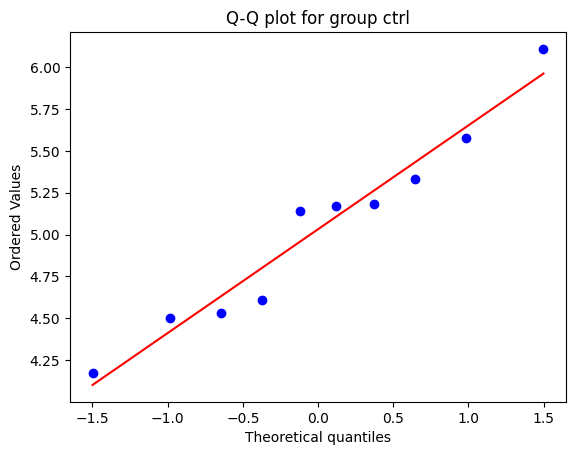

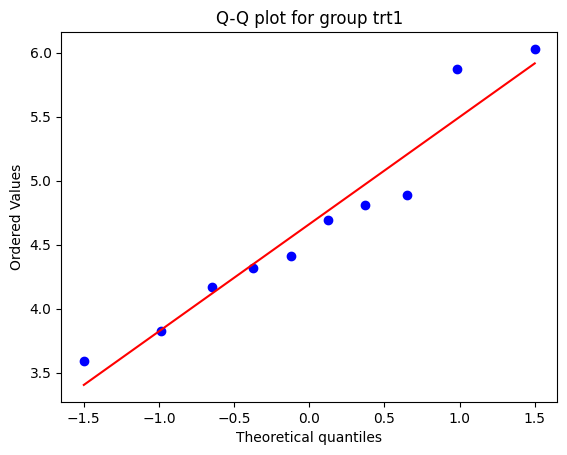

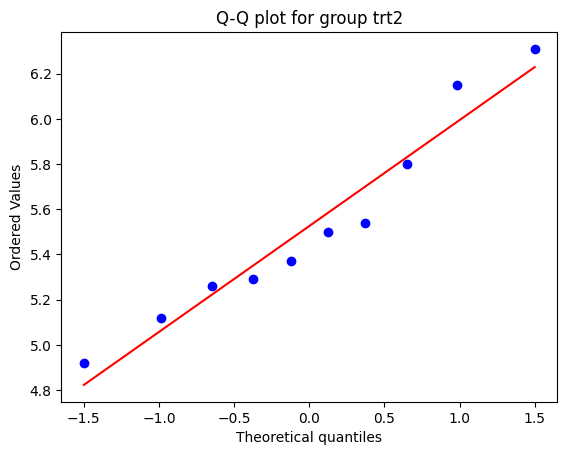

Levene’s Test statistic: 1.1191856948703909, p-value: 0.3412266241254737
ANOVA statistic: 4.846087862380136, p-value: 0.0159099583256229
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


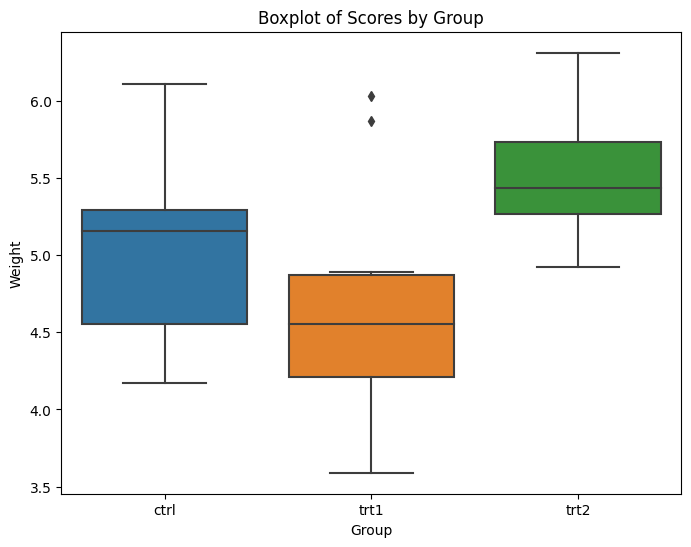

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns


df = pd.read_csv('/kaggle/input/plantito/plantgrowth.csv')


groups = df['group'].unique()
for group in groups:
    group_data = df[df['group'] == group]['weight']
    stats.probplot(group_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for group {group}')
    plt.show()

stat, p_value = levene(*[df[df['group'] == group]['weight'] for group in groups])
print(f'Levene’s Test statistic: {stat}, p-value: {p_value}')

anova_result = f_oneway(*[df[df['group'] == group]['weight'] for group in groups])
print(f'ANOVA statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}')

if anova_result.pvalue < 0.05:
    tukey = pairwise_tukeyhsd(df['weight'], df['group'], alpha=0.05)
    print(tukey.summary())

plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='weight', data=df)
plt.title('Boxplot of Scores by Group')
plt.xlabel('Group')
plt.ylabel('Weight')
plt.show()
